# **<center> CHE 1125 - Homework 4 </center>**    
### **<center> Abhishek Patel </center>**

## Using the latest E. coli reconstruction iML1515, perform the following tasks. [10 pts]

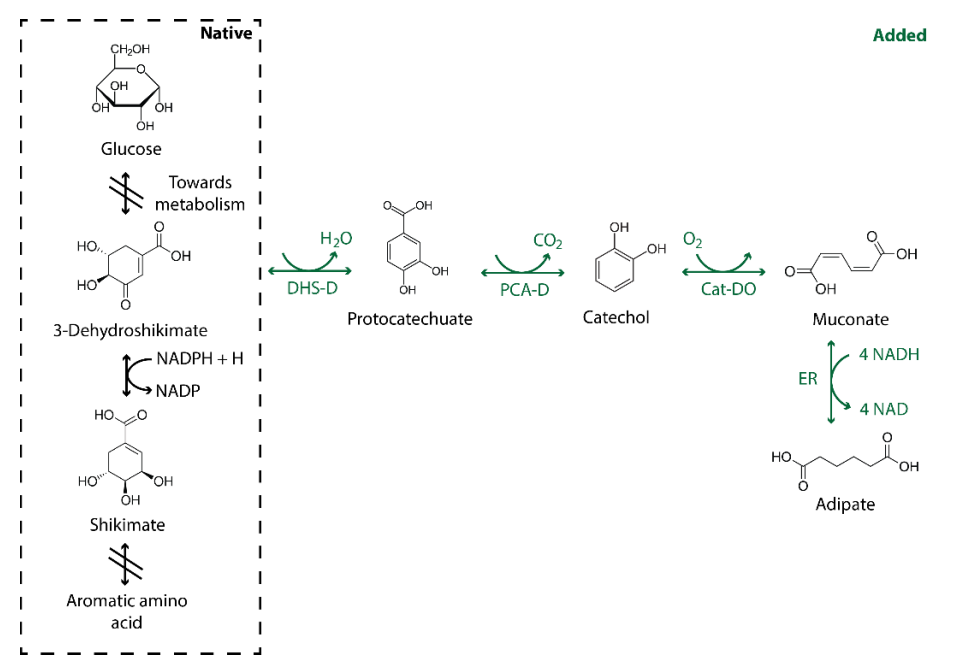

In [1]:
import cobra
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iML1515 = cobra.io.load_model('iML1515')
display(iML1515)

Name,iML1515
Memory address,0x01bc9a709790
Number of metabolites,1877
Number of reactions,2712
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685
Compartments,"cytosol, extracellular space, periplasm"


In [3]:
print('Reactions:\n')
display([(reaction.id,reaction.name) for reaction in iML1515.reactions])
print('\nMetabolites:\n')
display([(metabolite.id,metabolite.name) for metabolite in iML1515.metabolites])

Reactions:



[('CYTDK2', 'Cytidine kinase (GTP)'),
 ('XPPT', 'Xanthine phosphoribosyltransferase'),
 ('HXPRT', 'Hypoxanthine phosphoribosyltransferase (Hypoxanthine)'),
 ('NDPK5', 'Nucleoside-diphosphate kinase (ATP:dGDP)'),
 ('SHK3Dr', 'Shikimate dehydrogenase'),
 ('NDPK6', 'Nucleoside-diphosphate kinase (ATP:dUDP)'),
 ('NDPK8', 'Nucleoside-diphosphate kinase (ATP:dADP)'),
 ('DHORTS', 'Dihydroorotase'),
 ('OMPDC', "Orotidine-5'-phosphate decarboxylase"),
 ('PYNP2r', 'Pyrimidine-nucleoside phosphorylase (uracil)'),
 ('G5SD', 'Glutamate-5-semialdehyde dehydrogenase'),
 ('CS', 'Citrate synthase'),
 ('ICDHyr', 'Isocitrate dehydrogenase (NADP)'),
 ('ALATA_L2', 'Alanine transaminase'),
 ('DURIPP', 'Deoxyuridine phosphorylase'),
 ('ACALD', 'Acetaldehyde dehydrogenase (acetylating)'),
 ('PTRCTA', 'Putrescine Transaminase'),
 ('ACS', 'Acetyl-CoA synthetase'),
 ('CYSDS', 'Cysteine Desulfhydrase'),
 ('MAN6PI', 'Mannose-6-phosphate isomerase'),
 ('PPA', 'Inorganic diphosphatase'),
 ('APRAUR', '5-amino-6-(5-ph


Metabolites:



[('octapb_c', 'Octanoate (protein bound)'),
 ('cysi__L_e', 'L Cystine C6H12N2O4S2'),
 ('dhap_c', 'Dihydroxyacetone phosphate'),
 ('prbatp_c', '1-(5-Phosphoribosyl)-ATP'),
 ('10fthf_c', '10-Formyltetrahydrofolate'),
 ('btal_c', 'Butanal C4H8O'),
 ('6pgg_c', '6-Phospho-beta-D-glucosyl-(1,4)-D-glucose'),
 ('co2_e', 'CO2 CO2'),
 ('akg_e', '2-Oxoglutarate'),
 ('gsn_e', 'Guanosine'),
 ('pydx5p_c', "Pyridoxal 5'-phosphate"),
 ('3dhgulnp_c', '3-keto-L-gulonate-6-phosphate'),
 ('g3ps_c', 'Glycerophosphoserine'),
 ('adphep_LD_c', 'ADP-L-glycero-D-manno-heptose'),
 ('lyx__L_c', 'L-Lyxose'),
 ('din_p', 'Deoxyinosine'),
 ('2pg_c', 'D-Glycerate 2-phosphate'),
 ('ptrc_p', 'Putrescine'),
 ('malt_p', 'Maltose C12H22O11'),
 ('pppn_p', 'Phenylpropanoate'),
 ('arbtn_p', 'Aerobactin minus Fe3'),
 ('hphhlipa_c', 'Heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA'),
 ('phphhlipa_c', 'Phospho-heptosyl-phospho-heptosyl-heptosyl-kdo2-lipidA'),
 ('13dpg_c', '3-Phospho-D-glyceroyl phosphate'),
 ('murein3px4p_p',
  '

## a. [4 pts] Add the entire adipic acid pathway to the model (everything in green).

### Verify if reactions are innately in the model.

In [4]:
print("Metabolite Object: (Glucose)")
display(iML1515.metabolites.get_by_id('glc__D_c'))

print("\nMetabolite Object: (3-Dehydroshikimate)")
display(iML1515.metabolites.get_by_id('3dhsk_c') )

print("\nMetabolite Object: (Shikimate)")
display(iML1515.metabolites.get_by_id('skm_c') )

print("\nReaction Object: (Shikimate & 3-Dehydroshikimate)")
display(iML1515.reactions.get_by_id('SHK3Dr'))

print('\nReaction Stoichiometry')
display(iML1515.reactions.SHK3Dr.metabolites)

Metabolite Object: (Glucose)


Metabolite identifier,glc__D_c
Name,D-Glucose
Memory address,0x01bc9b84b5e0
Formula,C6H12O6
Compartment,c
In 22 reaction(s),"MLTG4, TRE6PH, AMALT3, GALS3, MLTG5, XYLI2, XYHDL, MLTG1, G6PP, AMALT1, BGLA1, GLCt2pp, GLCATr, GLCabcpp, HEX1, TREH, MLTG2, LACZ, G1PP, MLTG3, AMALT4, AMALT2"



Metabolite Object: (3-Dehydroshikimate)


Metabolite identifier,3dhsk_c
Name,3-Dehydroshikimate
Memory address,0x01bc9b9b6fd0
Formula,C7H7O5
Compartment,c
In 2 reaction(s),"SHK3Dr, DHQTi"



Metabolite Object: (Shikimate)


Metabolite identifier,skm_c
Name,Shikimate
Memory address,0x01bc9b7998e0
Formula,C7H9O5
Compartment,c
In 3 reaction(s),"SHK3Dr, SHKK, SKMt2pp"



Reaction Object: (Shikimate & 3-Dehydroshikimate)


Reaction identifier,SHK3Dr
Name,Shikimate dehydrogenase
Memory address,0x01bc9bf95880
Stoichiometry,3dhsk_c + h_c + nadph_c <=> nadp_c + skm_c 3-Dehydroshikimate + H+ + Nicotinamide adenine dinucleotide phosphate - reduced <=> Nicotinamide adenine dinucleotide phosphate + Shikimate
GPR,b3281 or b1692
Lower bound,-1000.0
Upper bound,1000.0



Reaction Stoichiometry


{<Metabolite 3dhsk_c at 0x1bc9b9b6fd0>: -1.0,
 <Metabolite h_c at 0x1bc9b71d700>: -1.0,
 <Metabolite nadph_c at 0x1bc9baa13a0>: -1.0,
 <Metabolite nadp_c at 0x1bc9b901d90>: 1.0,
 <Metabolite skm_c at 0x1bc9b7998e0>: 1.0}

### Using cobra, add the reactions you would add by either genome integration or plasmids. Remember to add adipate transport and export. 

### Knowing there will be no adipic acid in the media make it impossible for the organism to uptake adipic acid.

In [5]:
# Adding all metabolites
dhsk_c = iML1515.metabolites.get_by_id('3dhsk_c')
h2o_c = iML1515.metabolites.get_by_id('h2o_c')
co2_c = iML1515.metabolites.get_by_id('co2_c')
o2_c = iML1515.metabolites.get_by_id('o2_c')
nadh = iML1515.metabolites.get_by_id('nadh_c')
nad = iML1515.metabolites.get_by_id('nad_c')
protocatechuate = cobra.Metabolite(id='proto_c', formula='C7H6O4', name='Protocatechuate', compartment='c')
catechol = cobra.Metabolite(id='cat_c', formula='C6H6O2', name='Catechol', compartment='c')
muconate = cobra.Metabolite(id='muc_c', formula='C6H4O4-2', name='Muconate', compartment='c')
adipate = cobra.Metabolite(id='adia_c', formula='C6H8O4', name='Adipate', compartment='c')
adipate_p = cobra.Metabolite(id='adia_p', formula='C6H8O4', name='Adipate', compartment='p')
adipate_e = cobra.Metabolite(id='adia_e', formula='C6H8O4', name='Adipate', compartment='e')

# Creating Reactions

# Reaction 1
reaction_1 = cobra.Reaction('3dhsktprt')
reaction_1.name = '3-Dehydroshikimate dehydration'
reaction_1.lower_bound = -1000
reaction_1.upper_bound = 1000
# Reaction_1 metabolites and thier Stoichiometries
reaction_1.add_metabolites({ dhsk_c: -1, protocatechuate: 1, h2o_c: 1})

# Reaction 2
reaction_2 = cobra.Reaction('pro2cat')
reaction_2.name = '3-Dehydroshikimate dehydration'
reaction_2.lower_bound = -1000
reaction_2.upper_bound = 1000
# Reaction_2 metabolites and thier Stoichiometries
reaction_2.add_metabolites({ protocatechuate: -1, catechol: 1, co2_c: 1})

# Reaction 3
reaction_3 = cobra.Reaction('cat2muc')
reaction_3.name = 'Catehol decarboxylation'
reaction_3.lower_bound = -1000
reaction_3.upper_bound = 1000
# Reaction_3 metabolites and thier Stoichiometries
reaction_3.add_metabolites({ catechol: -1, o2_c: -1, muconate: 1})

# Reaction 4
reaction_4 = cobra.Reaction('muc2adia')
reaction_4.name = 'Adipate production'
reaction_4.lower_bound = -1000
reaction_4.upper_bound = 1000
# Reaction_4 metabolites and thier Stoichiometries
reaction_4.add_metabolites({ muconate: -1, nadh: -4, nad: 4, adipate: 1})

# Adding the Reactions
iML1515.add_reactions([reaction_1])
iML1515.add_reactions([reaction_2])
iML1515.add_reactions([reaction_3])
iML1515.add_reactions([reaction_4])

# Creating Adipate Transport and Export

# Adipate Transport from Cytosol to Periplasm
reaction_5 = cobra.Reaction('adia_tran')
reaction_5.name = 'Adipate transport'
reaction_5.lower_bound = -1000
reaction_5.upper_bound = 1000
reaction_5.add_metabolites({adipate: -1, adipate_p: 1})

# Adipate Transport from Periplasm to External
reaction_6 = cobra.Reaction('adia_exp')
reaction_6.name = 'Adipate export'
reaction_6.lower_bound = -1000
reaction_6.upper_bound = 1000
reaction_6.add_metabolites({adipate_p: -1, adipate_e: 1})

# Adipate Transport from External to Sink
reaction_7 = cobra.Reaction('EX_aa_e')
reaction_7.name = 'Adipate export'
reaction_7.lower_bound = 0
reaction_7.upper_bound = 1000
reaction_7.add_metabolites({adipate_e: -1})

# # Adding Adipate Transport and Export
iML1515.add_reactions([reaction_5])
iML1515.add_reactions([reaction_6])
iML1515.add_reactions([reaction_7])

In [6]:
print('No. of Metabolites in the modified model: ', len(iML1515.metabolites))
print('No. of Reactions in the modified model:', len(iML1515.reactions))

No. of Metabolites in the modified model:  1883
No. of Reactions in the modified model: 2719


### Set the oxygen uptake lower bound to -20 mmol/(gDW* h)

In [7]:
# Original Oxygen Uptakes from External --> Periplasm --> Cytosol
display(iML1515.reactions.get_by_id('EX_o2_e'))

# Modifiing O2 uptake Lower bounds
iML1515.reactions.EX_o2_e.lower_bound = -20

display(iML1515.reactions.get_by_id('EX_o2_e'))

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x01bc9cdf3b50
Stoichiometry,o2_e <=> O2 O2 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x01bc9cdf3b50
Stoichiometry,o2_e <=> O2 O2 <=>
GPR,
Lower bound,-20
Upper bound,1000.0


## What is the maximal theoretical yield of adipic acid production? (p.s. it’s not 1000)

In [8]:
iML1515.objective = 'EX_aa_e'
iML1515.optimize().objective_value
print(iML1515.summary())

Objective
1.0 EX_aa_e = 6.496901408450734

Uptake
------
Metabolite    Reaction  Flux  C-Number  C-Flux
  glc__D_e EX_glc__D_e    10         6 100.00%
      o2_e     EX_o2_e 11.27         0   0.00%

Secretion
---------
Metabolite Reaction   Flux  C-Number C-Flux
    adia_e  EX_aa_e -6.497         6 64.97%
     co2_e EX_co2_e -21.02         1 35.03%
     h2o_e EX_h2o_e -14.52         0  0.00%
       h_e   EX_h_e -32.48         0  0.00%



## b. [1 pts] What is the maximal growth rate of this new organism? How does it compare to the WT model (iML1515 before modifying it)? Why is it the way it is?

In [9]:
# Set the objective function to maximize biomass production
iML1515.objective = "BIOMASS_Ec_iML1515_core_75p37M"

# Set environmental constraints (e.g., nutrient uptake rates)
iML1515.reactions.get_by_id("EX_glc__D_e").lower_bound = -10  # Example: glucose uptake rate

# Get the maximal growth rate
max_growth_rate = iML1515.optimize().objective_value
print("Maximal Growth Rate:", max_growth_rate)

Maximal Growth Rate: 0.821797933626612


In [10]:
cobra.io.write_sbml_model(iML1515,"iML1515_New.xml")

It has a lower biomass production, thus a lower growth rate compared to the original. This maybe becuase of the fact that O2 uptake may have become a limiting factor as, the reversibility of the reaction was reduced, thus the cell may have not been getting enough O2, or may have been in excess O2 but couldn't survive in excess O2.

## c. [3 pts] Make a phenotypic phase plane of you new organism for the aerobic or the anaerobic case.

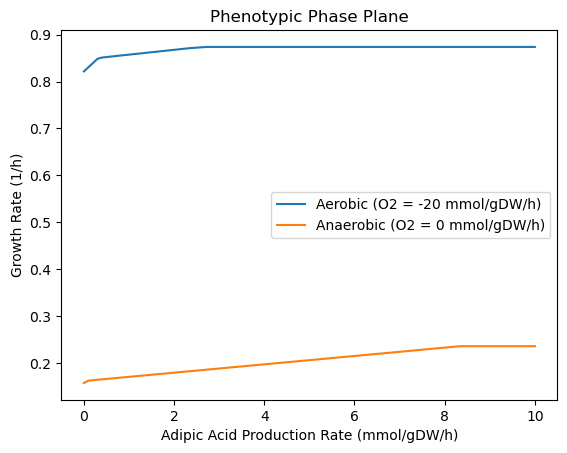

In [17]:
# List of different oxygen uptake rates (representing aerobic and anaerobic conditions)
oxygen_uptake_rates = [-20, 0]  # Aerobic and Anaerobic

# Initialize an array to store growth rates
growth_rates = []

# Loop through different oxygen uptake rates
for o2_rate in oxygen_uptake_rates:
    # Set the oxygen uptake rate
    iML1515.reactions.EX_o2_e.lower_bound = o2_rate

    # Vary adipic acid production rate (e.g., from 0 to some maximum)
    production_rates = np.linspace(0, 10, 100)  # Adjust the range and number of points as needed

    # Initialize an array to store growth rates for each production rate
    growth_rates_o2_condition = []

    for production_rate in production_rates:
        # Set the objective to maximize adipic acid production
        iML1515.reactions.EX_aa_e.lower_bound = -production_rate

        # Optimize for maximal growth
        solution = iML1515.optimize()
        growth_rate = solution.objective_value
        growth_rates_o2_condition.append(growth_rate)

    growth_rates.append(growth_rates_o2_condition)

# Phenotypic Phase Plane (PPP) Plot
plt.figure()
plt.plot(production_rates, growth_rates[0], label='Aerobic (O2 = -20 mmol/gDW/h)')
plt.plot(production_rates, growth_rates[1], label='Anaerobic (O2 = 0 mmol/gDW/h)')
plt.xlabel('Adipic Acid Production Rate (mmol/gDW/h)')
plt.ylabel('Growth Rate (1/h)')
plt.legend()
plt.title('Phenotypic Phase Plane')
plt.show()

### **Is it Growth Coupled?**

**Growth coupling refers to a condition in which the production of a particular compound (in this case, adipic acid) is directly linked to the growth rate of an organism. In other words, for a compound to be growth-coupled, the organism should only produce it when it's needed for its own growth.** 
Meaning if adipic acid production is growth-coupled to the modified organism, it means that the organism will only produce adipic acid when it benefits its own growth, and the production of adipic acid and growth rate should be positively correlated.

`Based on the phenotypic phase plane plot above, it can be observed that for both Aerobic and Anarobic growth conditions, they both are positively correlated to Adipate Production Rate.It suggests that adipic acid production is growth-coupled. However, if there is no clear correlation or if the growth rate decreases as adipic acid production increases, it may not be growth-coupled.`

### Why is the yield the way it is in anaerobic conditions?  

The `yield is influenced by various factors,` including the *metabolic pathways and the availability of resources.* In **Anaerobic conditions**, the organism may have limited oxygen uptake, which can affect its metabolic pathways and energy production. This limited oxygen availability can lead to a different metabolic state compared to aerobic conditions.

The lower yield of adipic acid in anaerobic conditions can be attributed to several factors:

**Limited Energy:** Anaerobic conditions generally yield less energy from glucose metabolism compared to aerobic conditions. This lower energy availability can affect the efficiency of the pathways involved in adipic acid production.

**Metabolic Shift:** The organism may undergo a metabolic shift in anaerobic conditions to prioritize other pathways over adipic acid production. Certain pathways may become more essential for survival in the absence of oxygen, which could divert resources away from adipic acid production.

**Different Enzyme Activity:** The enzymes involved in the adipic acid production pathway may have different activity levels or regulations under anaerobic conditions, impacting the overall yield of adipic acid.

**Redox Balance:** Adipic acid production involves redox reactions. In anaerobic conditions, the availability of electron acceptors (e.g., oxygen) is limited, which can affect the balance of reducing equivalents (NADH and NADPH) and, in turn, the efficiency of redox-dependent pathways.

From the above 4 possibilites, it seems based on the PPP plot, that the organism may have prioritized the **Metabolic shift**, i.e., *`other pathways over adipic acid production just to survive.`* The other possibillity that is highly likely the cause is the **Redox Balance**, it may have had lower amount of free electron due to the lack of O2, therefore completely cutting off the Adipate production.

## d. [2 pts] If you were to design this organism and grow it commercially, would you prefer your product to be growth coupled or not? Justify


Both growth-coupled and non-growth-coupled production strategies have their advantages and disadvantages, and the choice whould align with my overall objectives. Here are some considerations to help me make an informed decision:

**Advantages of Growth-Coupled Production:**

**`Efficiency:`** Growth-coupled production generally allows for higher overall productivity. The organism naturally produces the desired product as it grows, which can lead to higher yields and cost-effectiveness.

**`Sustainability:`** Growth-coupled production can be more sustainable since it utilizes the organism's own metabolic pathways and resources efficiently. This can lead to reduced waste and resource consumption.

**`Process Simplification:`** In a growth-coupled system, the production process is inherently integrated into the organism's growth, which can simplify the production process and reduce the need for complex reactor systems.

**Advantages of Non-Growth-Coupled Production:**

**`Flexibility:`** Non-growth-coupled production systems allow you to decouple growth and production. This means you can optimize production independently of the organism's growth, which may be beneficial for specific applications.

**`Fine-Tuning:`** In a non-growth-coupled system, you have more control over the production rate. You can adjust and fine-tune production rates to meet specific product demands and optimize the process.

**`Product Purity:`** Non-growth-coupled systems can sometimes result in higher product purity since the organism doesn't allocate resources to growth. This can be crucial in pharmaceutical and biotechnology applications.

**Justification:**

For: 
**`High-Volume, Low-Cost Products:`** If you are producing a product in high volume and cost-efficiency is a top priority, growth-coupled production is often preferred. It can lead to higher yields and lower production costs.

**`High-Purity or High-Value Products:`** If My product is high-purity or high-value (e.g., pharmaceuticals), you might prefer non-growth-coupled production. This approach allows you to optimize for product quality and purity, even if it comes at the cost of lower overall productivity.

**`Flexibility and Scalability:`** Non-growth-coupled systems provide greater flexibility in production and scalability. You can adjust production rates as needed and scale up or down more easily.

In practice, the choice may also depend on the specific characteristics of the organism, the process requirements, and regulatory considerations. Ultimately, the decision should be made based on a thorough evaluation of My production goals and constraints.

SO based on the above advantages and disadvantages for both Growth coupled and Non Growth couples, I can say that if I were to choose a ***`High Volume, Low Cost Product ======> Growth Coupled Production`***. But if I were to choose a `**Flexible and Scalable and a High Purity Production =======> Non Growth Coupled Production`**.